In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [6]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [2]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


### Drop duplicates and check multiple ıd patients

In [7]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(2822, 11)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
ElapsedTime(second)     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     I

In [18]:
train["ID"].value_counts()[:16]

489     2
3165    2
2981    2
3606    2
3470    2
3527    2
521     2
425     2
2666    2
1840    2
320     2
219     2
325     2
1032    2
2840    2
2273    2
Name: ID, dtype: int64

In [23]:
train[train.ID == 2273]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474
1871,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6472


In [21]:
train[train.ID == 3016]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
142,3016,{'M62.0'},{'B'},Genel Anestezi,Kas?n diastaz?,32,FEMALE,PLAST?K CERRAH?,39,2,7400
2160,3016,{'M62.0'},{'B'},Genel Anestezi,Kas?n diastaz?,32,FEMALE,PLAST?K CERRAH?,39,2,7400


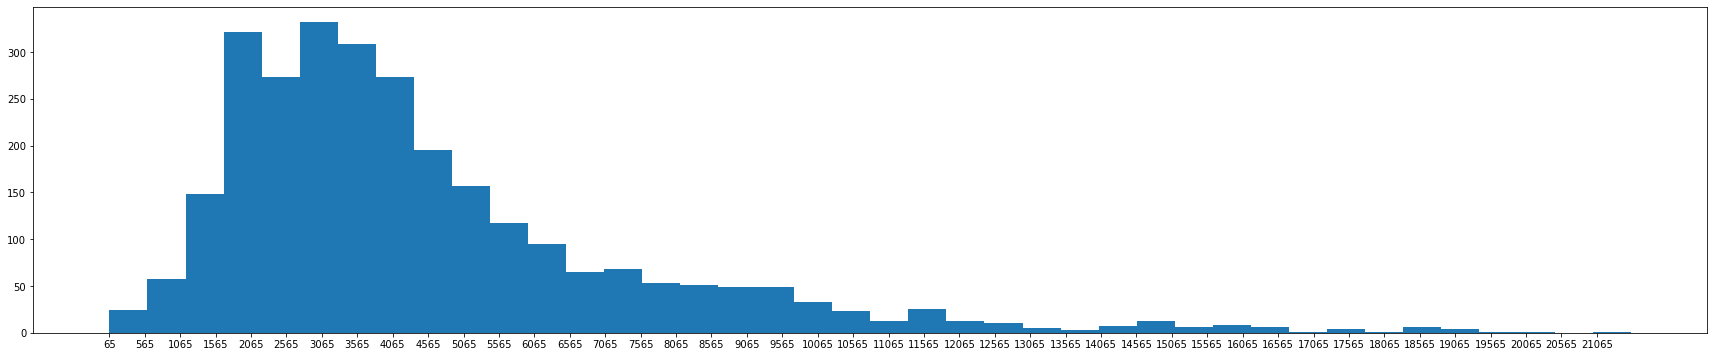

In [41]:
plt.figure(figsize=(30,6))
plt.hist(train["ElapsedTime(second)"], bins=40)
plt.xticks(range(min(train["ElapsedTime(second)"]), max(train["ElapsedTime(second)"])+1, 500))
plt.show()


In [30]:
train[train["ElapsedTime(second)"]<300]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
20,939,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",0,MALE,ÜROLOJ? SERV?S?,11,4,166
331,2624,{'M25.5'},"{'B', 'C'}",Genel Anestezi,Eklem a?r?s?,57,FEMALE,ORTOPED? SERV?S?,40,13,97
611,290,{'I83.9'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,44,FEMALE,GENEL KARMA CERRAH? SERV?S?,25,2,65
900,1198,{'K40.9'},{'C'},Spinal Anestezi,?nguinal herni,62,MALE,GENEL CERRAH? SERV?S?,47,9,101
1413,2032,{'N35'},{'C'},Spinal Anestezi,Üretra darl???,71,MALE,ÜROLOJ? SERV?S?,31,13,71
2097,930,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",1,MALE,ÜROLOJ? SERV?S?,11,4,169
2433,2032,{'N35'},{'C'},Spinal Anestezi,Üretra darl???,71,MALE,ÜROLOJ? SERV?S?,31,13,72
2505,937,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",1,MALE,ÜROLOJ? SERV?S?,11,4,166
2661,1813,NaN,{'C'},NaN,NaN,51,MALE,ORTOPED? SERV?S?,17,14,82


In [47]:
train["SurgeryName"].value_counts()[-20:]

Medial malleol k?r???, kapal?                                                            1
Nazal septum deviasyonu | Burun ve nazal sinüslerin di?er tan?mlanm?? bozukluklar?       1
Aksesuar meme                                                                            1
Tibia üst uç k?r???                                                                      1
Artiküler k?k?rdak di?er bozukluklar?                                                    1
Safra kesesi ta??, akut kolesistit ile | Kolelitiazis, di?er                             1
Anal fissür, akut                                                                        1
Böbrek ta?? | Üreter ta??                                                                1
L60,6                                                                                    1
Servikal disk bozukluklar?, di?er                                                        1
Metatarsal kemik k?r???                                                                  1

In [49]:
test = pd.read_csv("./data/test.csv", encoding="latin-1")

In [50]:
test.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
0,1669,{'H26.9'},{'C'},Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13
1,2091,{'L05.9'},{'C'},Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6
2,585,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14
3,1455,{'S42.2'},{'B'},Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14
4,1801,{'I82'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13


In [63]:
set(test["SurgeryName"]) - set(train["SurgeryName"])

{'Akut lenfadenit, tan?mlanmam??',
 'Akut lenfadeniti, alt ekstremite',
 'Artroz, tan?mlanmam??, omuz bölgesi',
 'Benign meme displazisi, tan?mlanmam??',
 'Bilateral inguinal herni; obstrüksiyonlu, gangrensiz | Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrenli',
 'Epididimis benign neoplazm?',
 'Gastro-özofajial reflü hastal???, özofajit ile',
 'Hemoroidler, tan?mlanmam?? komplikasyonsuz',
 'Kronik kolesistit',
 'Mesane yan duvar? malign neoplazm?',
 'Nonsüpüratif otitis media',
 'Romatoid nodül, di?er',
 'Tibian?n alt uç k?r???, kapal?',
 'Vajen ve vulvan?n di?er enflamasyonu'}

In [64]:
set(train["SurgeryName"])

{'?alazyon',
 '?nguinal herni',
 '?ntervertebral disk bozukluklar? di?er, tan?mlanmam??',
 '?ntervertebral disk bozukluklar? di?er, tan?mlanmam?? | Lomber vertebra k?r???',
 '?ntervertebral disk bozukluklar?, tan?mlanmam??',
 'A??r? kanama, premenapozal dönemde',
 'A??r? ve s?k menstrüasyon, düzenli siklus ile',
 'A??r? ve s?k menstrüasyon, düzensiz siklus ile',
 'A?il tendon yaralanmas?',
 'A?r?, tan?mlanmam??',
 'Abdominal herni di?er, tan?mlanm?? obstrüksiyon ve gangrensiz',
 'Abdominal herni, obstrüksiyon ve gangrensiz tan?mlanmam??',
 'Adenoidlerin hipertrofisi',
 'Aksesuar meme',
 'Akut kolesistit',
 'Akut sistit',
 'Allerjik rinit, di?er',
 'Alt ekstremitenin lokalize ?i?me, kitle ve yumrusu',
 'Alt ekstremitenin variköz venleri',
 'Alt ekstremitenin variköz venleri, enflamasyonla birlikte',
 'Alt ekstremitenin variköz venleri, ülserli',
 'Alt üriner sistem ta??, tan?mlanmam??',
 'Anal fissür tan?mlanmam??',
 'Anal fissür, akut',
 'Anal fissür, kronik',
 'Anal fistül',
 'Anal po

In [73]:
df = train[train["SurgeryName"].str.contains('Umbilikal', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
71,241,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,MALE,GENEL CERRAH? SERV?S?,47,10,5330
145,1247,"{nan, 'K43.9', 'K42.0'}","{'D', 'C'}",Genel Anestezi,"Umbilikal herni, obstrüksiyonsuz, gangrenli",69,FEMALE,GENEL CERRAH? SERV?S?,36,13,7839
148,2446,{'K42.0'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",30,FEMALE,GENEL CERRAH? SERV?S?,5,13,2839
155,961,"{'K42.1', nan}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,61,MALE,GENEL CERRAH? SERV?S?,5,7,3320
211,2504,"{'K42.0', 'K80.8'}","{'B', 'C'}",Genel Anestezi,"Kolelitiazis, di?er | Umbilikal herni; obstrük...",57,MALE,GENEL CERRAH? SERV?S?,36,6,3124
248,1165,{'K42'},{'C'},Spinal Anestezi,Umbilikal herni,60,MALE,GENEL CERRAH? SERV?S?,36,4,4143
518,2194,{'K42.0'},"{'E', 'C'}",Genel Anestezi,Umbilikal herni,50,FEMALE,GENEL CERRAH? SERV?S?,47,13,3355
526,2157,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,2988
572,3465,{'K42'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,53,FEMALE,GENEL CERRAH? SERV?S?,5,4,3030
601,2903,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,FEMALE,GENEL CERRAH? SERV?S?,36,14,4849


In [75]:
train.iloc[df.SurgeryName.str.len().sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
71,241,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,MALE,GENEL CERRAH? SERV?S?,47,10,5330
1996,3153,{'K42.0'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,56,MALE,GENEL CERRAH? SERV?S?,5,11,3097
2314,3359,"{'L30.8', 'M79.1', 'K42'}",{'C'},Genel Anestezi,Umbilikal herni,41,FEMALE,GENEL CERRAH? SERV?S?,29,4,2575
1892,644,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,33,10,4077
1808,924,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,27,FEMALE,GENEL CERRAH? SERV?S?,44,12,3906
1706,650,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,48,FEMALE,GENEL CERRAH? SERV?S?,33,10,6180
1611,2154,"{nan, 'K42.0'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,3296
1534,596,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,28,MALE,GENEL CERRAH? SERV?S?,33,4,3123
1218,3163,{'K42.9'},{'C'},Genel Anestezi,Umbilikal herni,37,FEMALE,GENEL CERRAH? SERV?S?,47,15,4046
1190,2793,{'K42.0'},"{'B', 'C'}",Genel Anestezi,Umbilikal herni,41,MALE,GENEL CERRAH? SERV?S?,36,2,5722


In [79]:
train.iloc[df["ElapsedTime(second)"].sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1037,3482,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,38,MALE,GENEL CERRAH? SERV?S?,5,11,2417
2314,3359,"{'L30.8', 'M79.1', 'K42'}",{'C'},Genel Anestezi,Umbilikal herni,41,FEMALE,GENEL CERRAH? SERV?S?,29,4,2575
2686,42,NaN,"{'B', 'C'}",NaN,"Umbilikal herni; obstrüksiyonlu, gangrensiz",53,MALE,GENEL CERRAH? SERV?S?,5,6,2599
2146,3317,"{nan, 'K43.9', 'K42.0'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,19,FEMALE,GENEL CERRAH? SERV?S?,36,11,2605
1753,1370,{'K42'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",69,MALE,GENEL CERRAH? SERV?S?,33,3,2776
148,2446,{'K42.0'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",30,FEMALE,GENEL CERRAH? SERV?S?,5,13,2839
526,2157,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,2988
572,3465,{'K42'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,53,FEMALE,GENEL CERRAH? SERV?S?,5,4,3030
1996,3153,{'K42.0'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,56,MALE,GENEL CERRAH? SERV?S?,5,11,3097
1534,596,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,28,MALE,GENEL CERRAH? SERV?S?,33,4,3123


In [80]:
df2 = train[train["SurgeryName"].str.contains('Mesane', na=False)]
df2

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
10,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
31,315,"{'N40', 'N21.0'}",{'B'},Genel Anestezi,Mesane ta??,50,MALE,ÜROLOJ? SERV?S?,31,10,6375
163,1365,{'N31.9'},{'D'},Spinal Anestezi,"Mesanenin nöromusküler disfonksiyonu, tan?mlan...",44,FEMALE,ÜROLOJ? SERV?S?,26,3,2299
210,2315,{'N21.0'},"{0, 'B', 'C'}",Spinal Anestezi,Mesane ta??,55,MALE,ÜROLOJ? SERV?S?,31,11,7211
238,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
588,244,"{'K21.9', 'N20.2', 'N30.0', 'N21.0'}",{'B'},Spinal Anestezi,Mesane ta??,53,MALE,ÜROLOJ? SERV?S?,15,2,5898
634,2865,"{'N21.0', 'N23'}",{'B'},Spinal Anestezi,Mesane ta??,49,MALE,ÜROLOJ? SERV?S?,27,14,2758
1044,955,{'C67.9'},{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam??",60,FEMALE,ÜROLOJ? SERV?S?,27,7,2103
1093,1479,"{nan, 'C67.9', 'N40'}",{0},Sedo Analjezi,"Mesane malign neoplazm?, tan?mlanmam??",48,MALE,ÜROLOJ? SERV?S?,31,14,6639
1122,850,"{'R31', 'C67.9'}",{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam?? | Hemat...",33,MALE,ÜROLOJ? SERV?S?,27,7,2438


In [ ]:
train.iloc[df2["ElapsedTime(second)"].sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
2744,1757,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",34,MALE,ÜROLOJ? SERV?S?,27,6,1432
2566,720,{'N30.0'},{'C'},Sedo Analjezi,Mesane benign neoplazm?,44,FEMALE,ÜROLOJ? SERV?S?,11,12,1640
2770,1755,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",56,MALE,ÜROLOJ? SERV?S?,27,6,1813
1044,955,{'C67.9'},{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam??",60,FEMALE,ÜROLOJ? SERV?S?,27,7,2103
2750,3243,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",68,MALE,ÜROLOJ? SERV?S?,27,12,2152
163,1365,{'N31.9'},{'D'},Spinal Anestezi,"Mesanenin nöromusküler disfonksiyonu, tan?mlan...",44,FEMALE,ÜROLOJ? SERV?S?,26,3,2299
1122,850,"{'R31', 'C67.9'}",{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam?? | Hemat...",33,MALE,ÜROLOJ? SERV?S?,27,7,2438
1772,987,{'N32.9'},{'C'},Genel Anestezi,"Mesane bozuklu?u, tan?mlanmam??",44,FEMALE,ÜROLOJ? SERV?S?,11,12,2494
2373,987,{'N32.9'},{'C'},Genel Anestezi,"Mesane bozuklu?u, tan?mlanmam??",44,FEMALE,ÜROLOJ? SERV?S?,11,12,2498
2628,3461,NaN,{0},NaN,Mesane ta??,49,MALE,ÜROLOJ? SERV?S?,27,12,2514


In [10]:
train[train["ID"]==3228]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
92,3228,"{'K21.9', 'J15.9', 'N30.0', 'N21.1', 'N30.9', ...",{'B'},Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581


In [22]:
train['DiagnosticICD10Code'].str.len().value_counts()

9.0     1258
7.0      471
14.0     320
12.0     119
18.0     105
23.0      63
16.0      48
27.0      42
36.0      33
25.0      27
32.0      21
34.0      15
10.0      14
21.0      12
30.0      11
24.0      10
33.0       5
17.0       4
43.0       3
41.0       3
45.0       2
22.0       2
19.0       2
28.0       2
15.0       2
42.0       2
26.0       2
40.0       1
79.0       1
50.0       1
Name: DiagnosticICD10Code, dtype: int64

<AxesSubplot:xlabel='ElapsedTime(second)', ylabel='Count'>

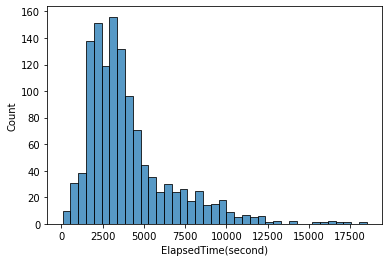

In [26]:
df = train[train['DiagnosticICD10Code'].str.len()==9]
sns.histplot(df["ElapsedTime(second)"])


<AxesSubplot:xlabel='ElapsedTime(second)', ylabel='Count'>

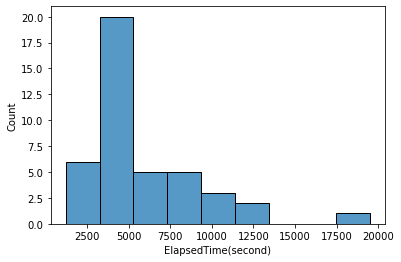

In [27]:
df = train[train['DiagnosticICD10Code'].str.len()==27]
sns.histplot(df["ElapsedTime(second)"])


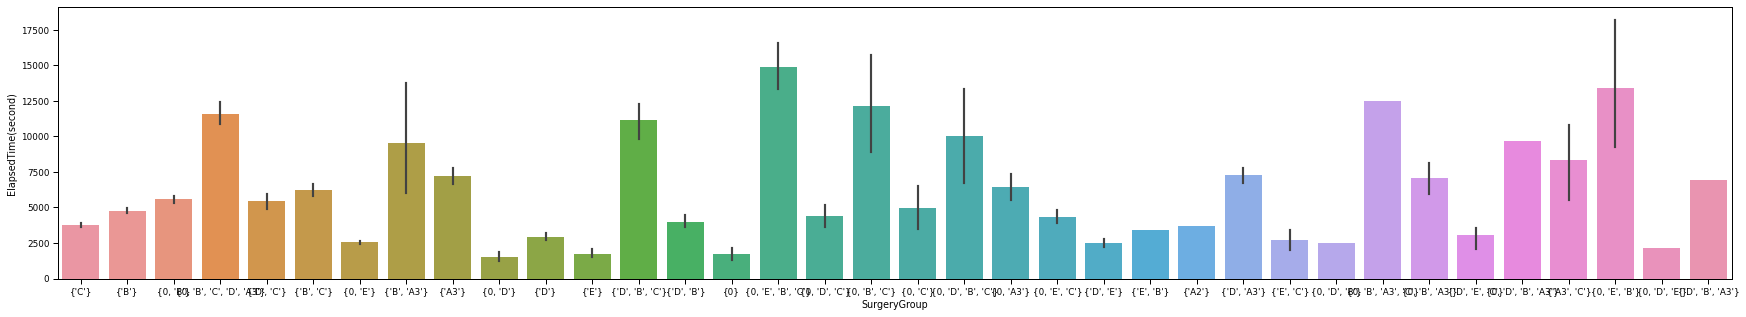

In [42]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["SurgeryGroup"], y="ElapsedTime(second)", data=train)
plt.show()


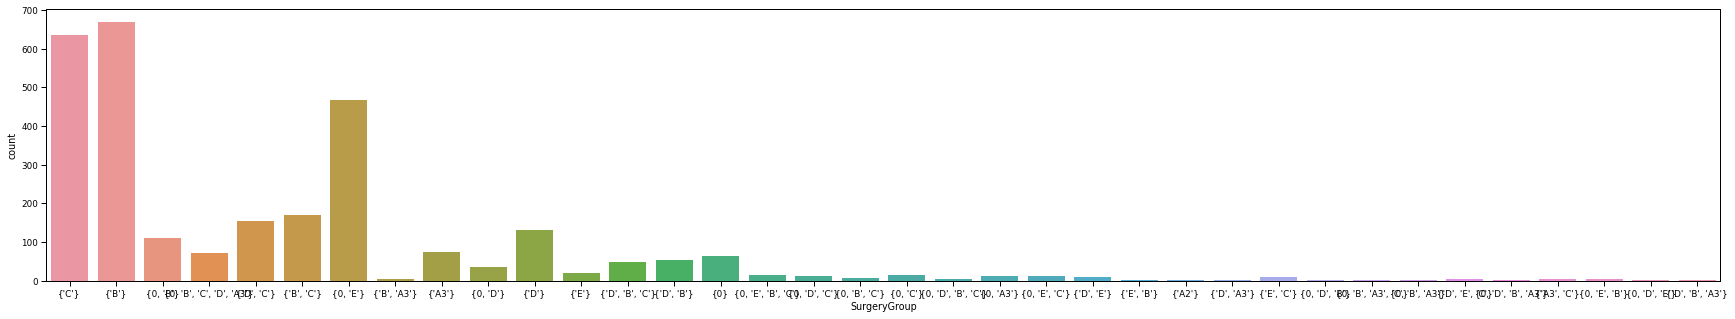

In [46]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=train["SurgeryGroup"], data=train)
plt.show()


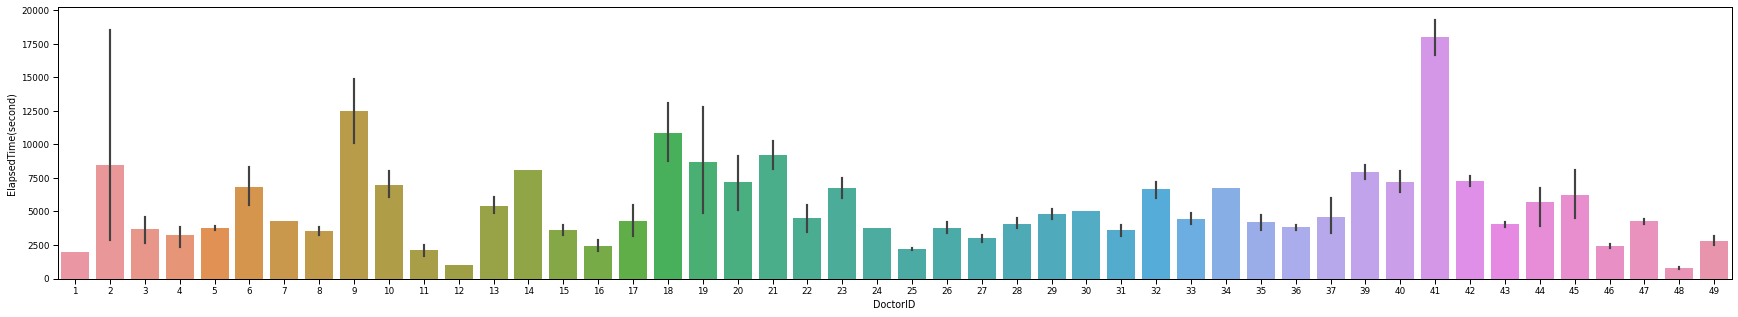

In [44]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["DoctorID"], y="ElapsedTime(second)", data=train)
plt.show()


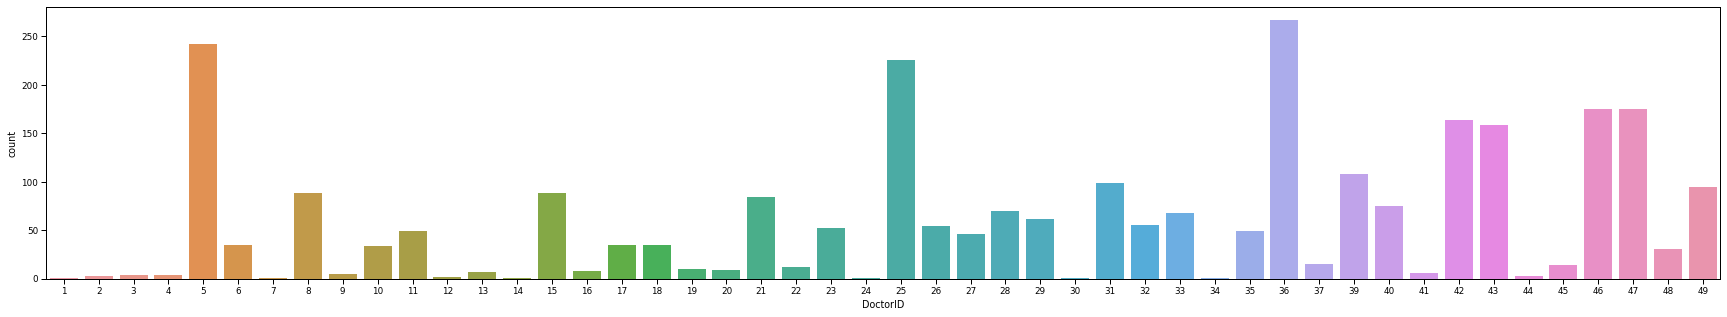

In [45]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=train["DoctorID"], data=train)
plt.show()


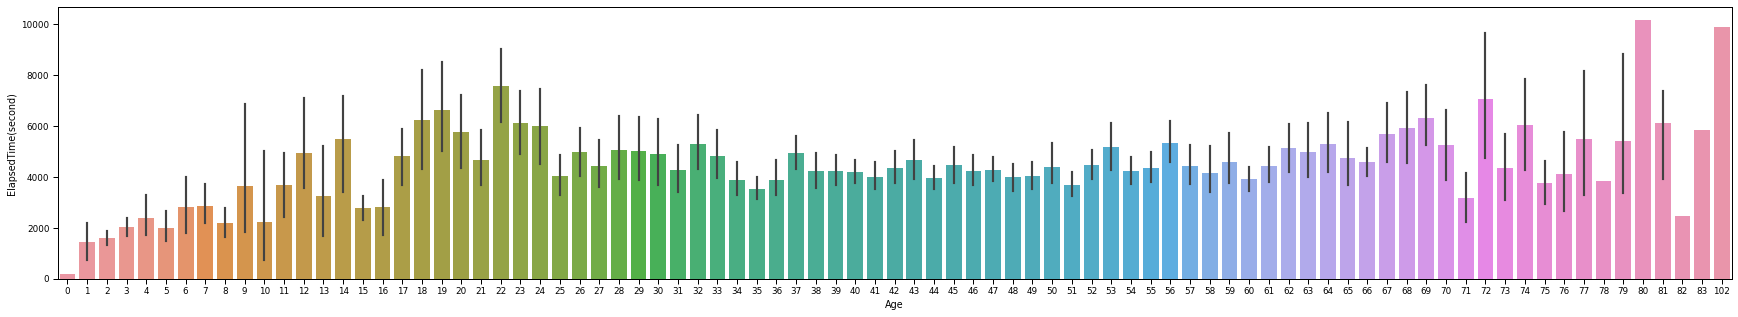

In [48]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["Age"], y="ElapsedTime(second)", data=train)
plt.show()


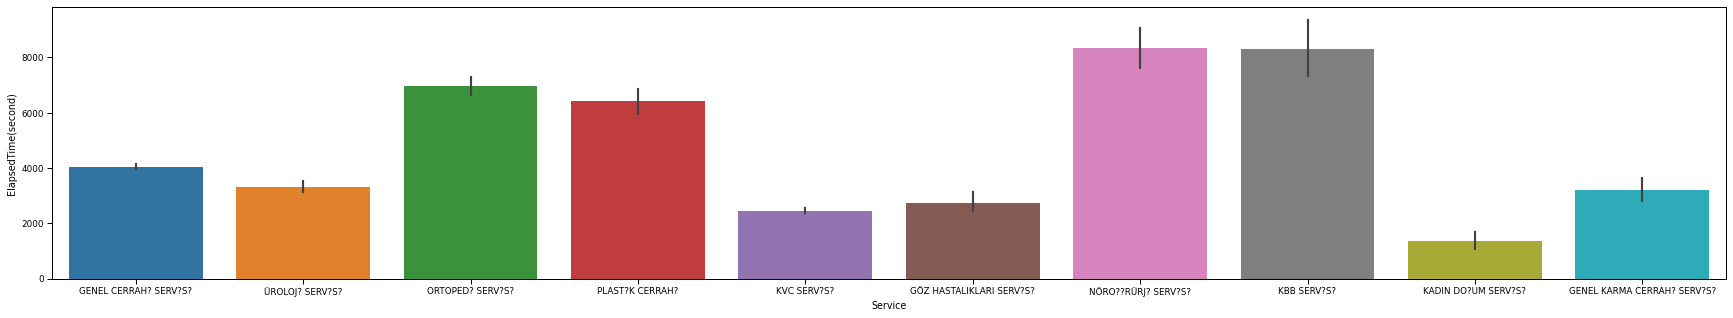

In [49]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["Service"], y="ElapsedTime(second)", data=train)
plt.show()


In [4]:
train[train["AnesthesiaType"]=='Epidural ve Genel Anestezi']

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
68,3481,"{nan, 'K40'}","{'B', 'C'}",Epidural ve Genel Anestezi,?nguinal herni,56,MALE,GENEL CERRAH? SERV?S?,5,11,5219
192,3022,{'N20.1'},"{'D', 'B', 'C'}",Epidural ve Genel Anestezi,Üreter ta??,43,FEMALE,ÜROLOJ? SERV?S?,31,2,3178
314,3150,"{'Z01.1', 'J35.2', 'H65.2'}",{'C'},Epidural ve Genel Anestezi,Kulak ve i?itme muayenesi,11,MALE,KBB SERV?S?,6,11,4234
419,2636,{'K42.0'},{'C'},Epidural ve Genel Anestezi,NaN,50,FEMALE,GENEL CERRAH? SERV?S?,36,6,2761
581,2800,"{nan, 'M51.0'}","{0, 'B'}",Epidural ve Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,46,FEMALE,NÖRO??RÜRJ? SERV?S?,21,6,7069
1711,3150,"{'Z01.1', 'J35.2', 'H65.2'}",{'C'},Epidural ve Genel Anestezi,Kulak ve i?itme muayenesi,11,MALE,KBB SERV?S?,6,11,4232
1975,2337,"{nan, 'M25.5'}","{'B', 'C'}",Epidural ve Genel Anestezi,Eklem a?r?s?,17,FEMALE,ORTOPED? SERV?S?,10,12,7514
2192,2963,"{nan, 'J34.2'}","{0, 'E', 'C'}",Epidural ve Genel Anestezi,Nazal septum deviasyonu,40,MALE,KBB SERV?S?,6,2,4208
2395,2964,{'M95.0'},{'C'},Epidural ve Genel Anestezi,Burnun kazan?lm?? deformitesi,20,FEMALE,PLAST?K CERRAH?,39,2,11328


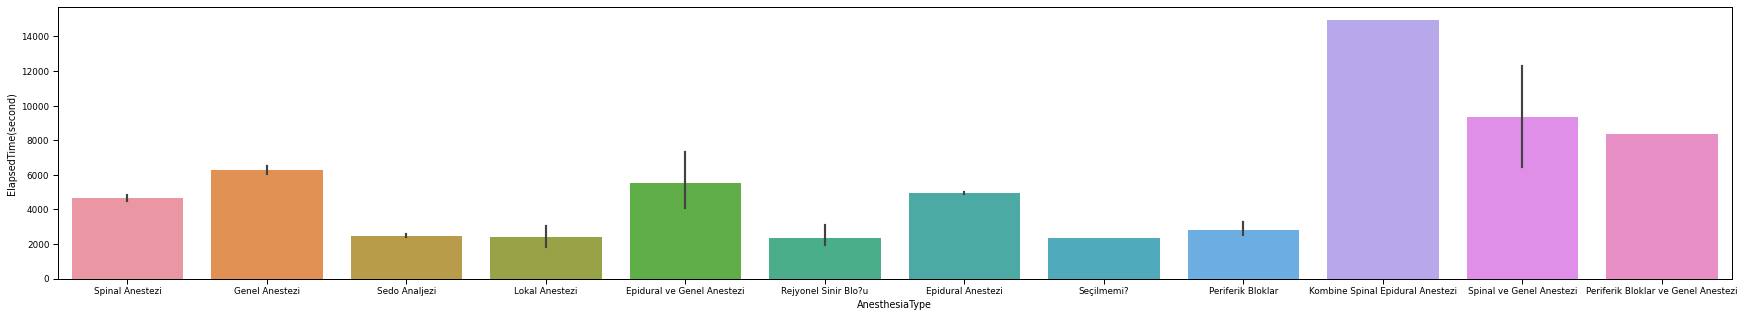

In [77]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="AnesthesiaType", y="ElapsedTime(second)", data=train)
plt.show()


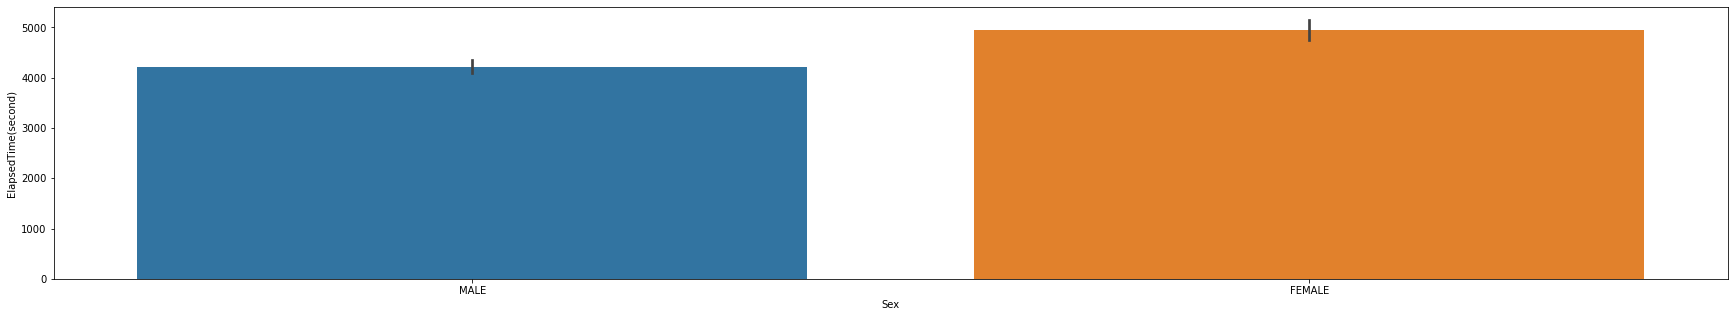

In [28]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="Sex", y="ElapsedTime(second)", data=train)
plt.show()


In [81]:
df = train[train["DiagnosticICD10Code"].str.contains('H', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
11,3408,{'H25.1'},{'C'},Sedo Analjezi,Senil nükleer katarakt,62,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,12,2203
30,256,{'H50'},{'C'},Genel Anestezi,"Strabismus di?er, tan?mlanm??",40,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,9,8592
45,1605,{'H26.9'},{'C'},Sedo Analjezi,"Katarakt, tan?mlanmam??",68,MALE,GÖZ HASTALIKLARI SERV?S?,49,12,1962
46,1255,{'H26.9'},{'C'},Sedo Analjezi,"Katarakt, tan?mlanmam??",53,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,9,2804
60,1378,{'H26.9'},{'C'},Sedo Analjezi,"Katarakt, tan?mlanmam??",76,FEMALE,GÖZ HASTALIKLARI SERV?S?,1,12,1967
...,...,...,...,...,...,...,...,...,...,...,...
2390,2458,{'H25.1'},{'C'},Sedo Analjezi,Senil nükleer katarakt,63,MALE,GÖZ HASTALIKLARI SERV?S?,49,14,2052
2446,2119,{'H02.9'},{'C'},Sedo Analjezi,"Göz kapa?? bozuklu?u, tan?mlanmam??",65,MALE,PLAST?K CERRAH?,39,4,4878
2452,1307,{'H26.9'},{'C'},Sedo Analjezi,NaN,70,MALE,GÖZ HASTALIKLARI SERV?S?,49,10,2450
2469,2384,{'H65.4'},{'B'},Genel Anestezi,NaN,47,FEMALE,KBB SERV?S?,6,11,6330


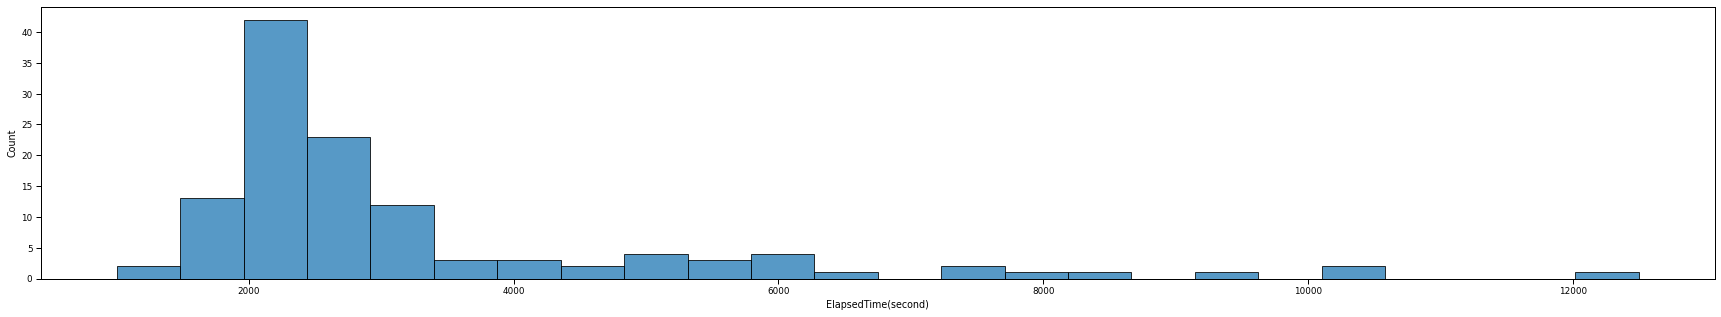

In [84]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df)
plt.show()


In [85]:
df = train[train["SurgeryGroup"].str.contains('A', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046
10,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
18,2180,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",56,MALE,ORTOPED? SERV?S?,42,11,8001
42,2529,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",43,FEMALE,NÖRO??RÜRJ? SERV?S?,42,2,9140
43,3014,"{'M50.1', 'Z00.0', 'E03.9'}",{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",44,FEMALE,NÖRO??RÜRJ? SERV?S?,42,6,9818
...,...,...,...,...,...,...,...,...,...,...,...
2723,109,NaN,{'A3'},NaN,"Servikal disk bozukluklar?, radikülopati ile",55,FEMALE,ORTOPED? SERV?S?,42,4,6062
2724,75,NaN,"{'D', 'A3'}",NaN,NaN,22,MALE,GENEL CERRAH? SERV?S?,35,11,7757
2728,4,NaN,"{'D', 'B', 'A3'}",NaN,Barsak fistülü,66,MALE,GENEL CERRAH? SERV?S?,36,2,6901
2730,2442,NaN,{'A3'},NaN,Lumbar ve di?er intervertebral disk bozuklukla...,57,FEMALE,ORTOPED? SERV?S?,42,4,5786


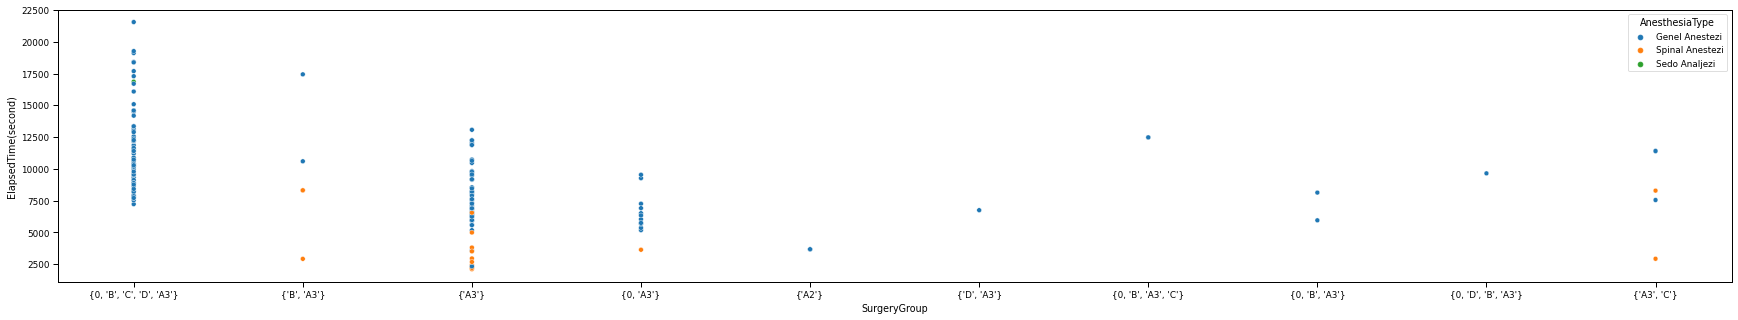

In [87]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.scatterplot(x="SurgeryGroup", y= "ElapsedTime(second)", hue="AnesthesiaType", data=df)
plt.show()


In [104]:
z["Diagnosis2"][4]

{'M48.0', 'M51.1'}

In [105]:
type(z["Diagnosis2"][0])
for i in z["Diagnosis2"][2014]:
    print(i[:2])


K2
N3
M1
I1
J1
R3


In [54]:
z = train.copy()
z["DiagnosticICD10Code"] = z["DiagnosticICD10Code"].str[1:-1]
z["DiagnosticICD10Code"] = z["DiagnosticICD10Code"].str.replace("'","")
z["SurgeryGroup"] = z["SurgeryGroup"].str[1:-1]
z["SurgeryGroup"] = z["SurgeryGroup"].str.replace("'","")
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [55]:
z['Any_NaN_Diagnos'] = z['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)


In [56]:
def clean_diagnosis(diagnosis):
    if isinstance(diagnosis, str):
        return set(diagnosis.replace(', nan', '').replace(' nan,', '').replace('nan,', '').replace(' ', '').split(','))
    else:
        return diagnosis

z['Diagnos_Clean'] = z['DiagnosticICD10Code'].apply(clean_diagnosis)

In [57]:
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,{L05}
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,{N20.1}
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,{K80.8}
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,{M51.1}
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"{M51.1, M48.0}"


In [58]:
z.Any_NaN_Diagnos.value_counts()

0    2336
1     486
Name: Any_NaN_Diagnos, dtype: int64

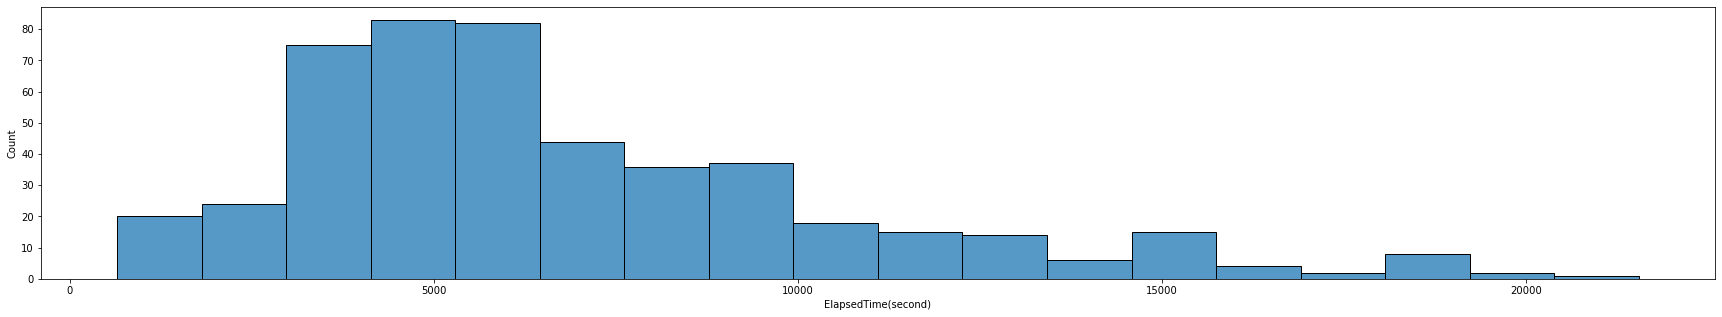

In [9]:
t = z[z["Any_NaN_Diagnos"]==1]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=t)
plt.show()


In [59]:
map_dict = {'0': 1, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A3': 5, 'A2': 6, 'A1': 7}

In [60]:
mapper = lambda x: [map_dict[val.strip()] for val in x.split(',')]

In [61]:
z["SurgeryGroup_Encode"] = z["SurgeryGroup"].apply(mapper)

In [62]:
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,{L05},[3]
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,{N20.1},[3]
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,{K80.8},[4]
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,{M51.1},"[1, 4]"
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"{M51.1, M48.0}","[1, 4, 3, 2, 5]"


In [63]:
z["SurgeryGroup_Sum"] = z["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
z["SurgeryGroup_Count"] = z["SurgeryGroup_Encode"].apply(lambda x: len(x))
z["SurgeryGroup_Avg"] = z["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
z["SurgeryGroup_Std"] = z["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
z["SurgeryGroup_Max"] = z["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
z["SurgeryGroup_Min"] = z["SurgeryGroup_Encode"].apply(lambda x: np.min(x))
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,{L05},[3],3,1,3.0,0.000000,3,3
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,{N20.1},[3],3,1,3.0,0.000000,3,3
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,{K80.8},[4],4,1,4.0,0.000000,4,4
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,{M51.1},"[1, 4]",5,2,2.5,1.500000,4,1
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"{M51.1, M48.0}","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1


In [19]:
z[z["Diagnos_Clean"].isna()==True][:15]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
2601,761,NaN,B,NaN,"Gövdenin lokalize ?i?me, kitle ve yumrusu",44,MALE,PLAST?K CERRAH?,28,9,2415,0,NaN,[4],4,1,4.0,0.000000,4,4
2602,1504,NaN,B,NaN,Anal polip,58,MALE,GENEL CERRAH? SERV?S?,36,14,2863,0,NaN,[4],4,1,4.0,0.000000,4,4
2603,1838,NaN,C,NaN,"Di?er iç yerle?im bozukluklar?, medial kollate...",21,FEMALE,ORTOPED? SERV?S?,23,11,4182,0,NaN,[3],3,1,3.0,0.000000,3,3
2604,118,NaN,B,NaN,Benign prostat hiperplazisi,69,MALE,ÜROLOJ? SERV?S?,11,9,3966,0,NaN,[4],4,1,4.0,0.000000,4,4
2605,6,NaN,"B, C",NaN,"Bilateral inguinal herni; obstrüksiyonlu, gang...",44,MALE,GENEL CERRAH? SERV?S?,5,4,3738,0,NaN,"[4, 3]",7,2,3.5,0.500000,4,3
2606,89,NaN,"D, B, C",NaN,Omuz rotator cuff tendon yaralanmas?,61,FEMALE,ORTOPED? SERV?S?,23,1,8672,0,NaN,"[2, 4, 3]",9,3,3.0,0.816497,4,2
2607,57,NaN,"0, E",NaN,"Alt ekstremitenin variköz venleri, enflamasyon...",31,FEMALE,GENEL KARMA CERRAH? SERV?S?,8,2,1426,0,NaN,"[1, 1]",2,2,1.0,0.000000,1,1
2608,106,NaN,"B, C",NaN,?nguinal herni,56,MALE,GENEL CERRAH? SERV?S?,5,7,5627,0,NaN,"[4, 3]",7,2,3.5,0.500000,4,3
2609,33,NaN,C,NaN,Pilonidal kist,22,FEMALE,GENEL CERRAH? SERV?S?,43,3,3440,0,NaN,[3],3,1,3.0,0.000000,3,3
2610,2129,NaN,C,NaN,"Di?er iç yerle?im bozukluklar?, medial kollate...",46,MALE,ORTOPED? SERV?S?,23,2,4052,0,NaN,[3],3,1,3.0,0.000000,3,3


## do max-min-mean-count too

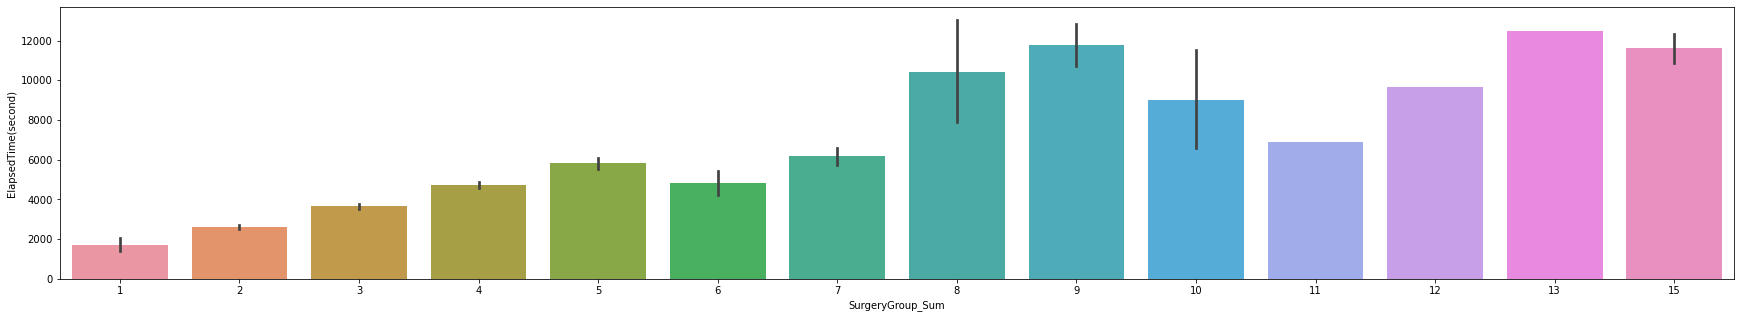

In [26]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="SurgeryGroup_Sum", y="ElapsedTime(second)", data=z)
plt.show()


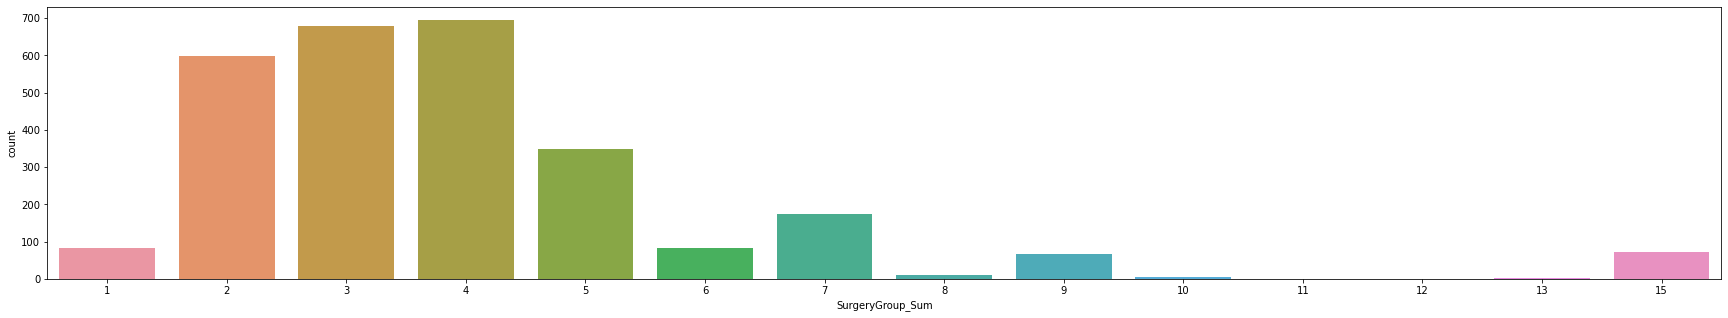

In [27]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="SurgeryGroup_Sum", data=z)
plt.show()


In [136]:
train.DiagnosticICD10Code.str.len().value_counts()


9.0     1258
7.0      471
14.0     320
12.0     119
18.0     105
23.0      63
16.0      48
27.0      42
36.0      33
25.0      27
32.0      21
34.0      15
10.0      14
21.0      12
30.0      11
24.0      10
33.0       5
17.0       4
43.0       3
41.0       3
45.0       2
22.0       2
19.0       2
28.0       2
15.0       2
42.0       2
26.0       2
40.0       1
79.0       1
50.0       1
Name: DiagnosticICD10Code, dtype: int64

In [135]:
train.iloc[train.DiagnosticICD10Code.str.len().sort_values(ascending=False).index][:20]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
92,3228,"{'K21.9', 'J15.9', 'N30.0', 'N21.1', 'N30.9', ...",{'B'},Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581
2014,245,"{'K21.9', 'J15.9', 'R31', 'N30.0', 'M19.9', 'I...",{'C'},Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415
651,448,"{'K21.9', 'J15.9', 'N20.0', 'N20.1', 'M19.9'}",{'B'},Genel Anestezi,Üreter ta??,30,MALE,ÜROLOJ? SERV?S?,15,9,3260
725,403,"{'K21.9', 'J15.9', 'N30.2', 'N20.0', 'M19.9'}",{'C'},Genel Anestezi,"Kronik sistitler, di?er",49,FEMALE,ÜROLOJ? SERV?S?,15,5,2710
622,1105,"{'K21.9', 'N30.2', 'R31', 'N30.0', 'M19.9'}",{'B'},Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6159
415,3710,"{'K80.8', 'L30', 'K29.1', 'M79.9', 'M79.1'}",{'B'},Genel Anestezi,"Kolesistitler, di?er",51,FEMALE,GENEL CERRAH? SERV?S?,29,6,6351
2094,1105,"{'K21.9', 'N30.2', 'R31', 'N30.0', 'M19.9'}",{'B'},Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6163
2295,1475,"{nan, 'M51.1', 'M43.1', 'M48.06', 'K29.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,67,FEMALE,ORTOPED? SERV?S?,42,13,10280
198,889,"{nan, 'M51.1', 'M54.5', 'M43.1', 'M48.06'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Bel a?r?s?,43,FEMALE,ORTOPED? SERV?S?,42,3,8649
251,2514,"{nan, 'K80.8', 'L30.8', 'K29.1', 'M79.1'}","{'D', 'B'}",Genel Anestezi,"Kolelitiazis, di?er",50,FEMALE,GENEL CERRAH? SERV?S?,29,12,5006


In [20]:
train["str_len"] = train["DiagnosticICD10Code"].str.len()
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),str_len
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,7.0
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,9.0
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,9.0
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,14.0
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,23.0


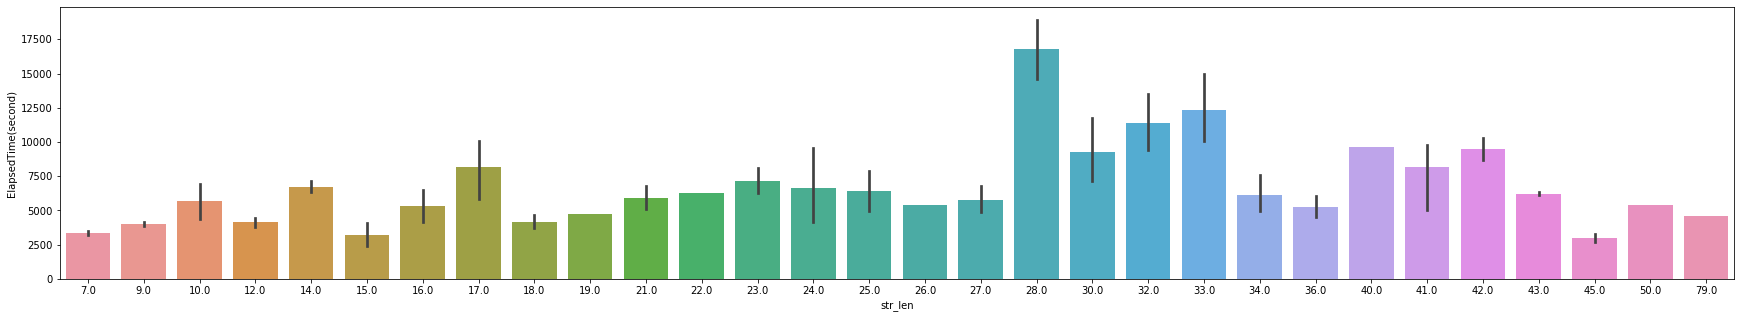

In [21]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="str_len", y="ElapsedTime(second)", data=train)
plt.show()

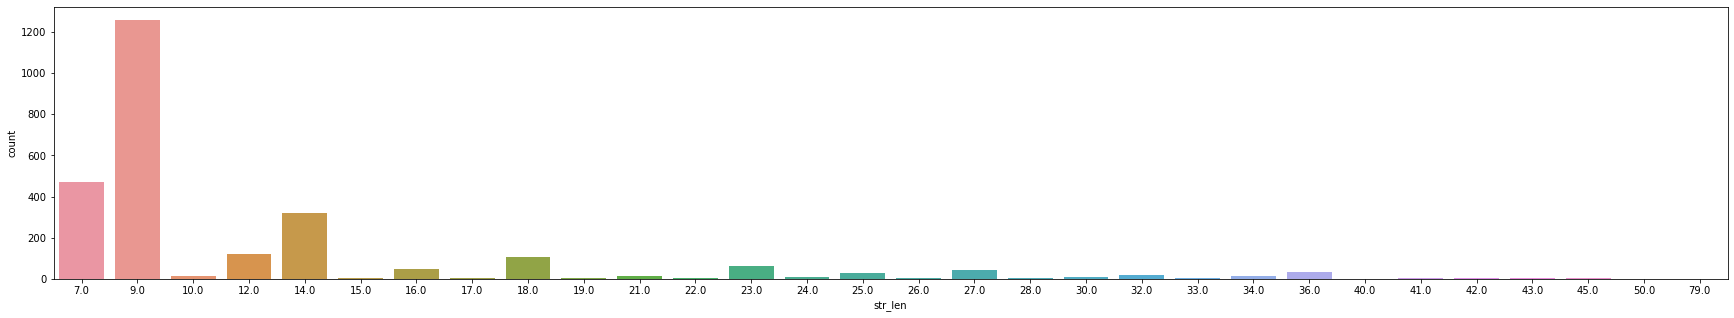

In [22]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="str_len", data=train)
plt.show()

In [64]:
z.loc[92, "Diagnos_Clean"] = np.nan

In [65]:
z.loc[2014, "Diagnos_Clean"] = np.nan

In [66]:
z[z["ID"]==3228]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
92,3228,"K21.9, J15.9, N30.0, N21.1, N30.9, L30.3, N40,...",B,Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581,0,NaN,[4],4,1,4.0,0.0,4,4


In [67]:
z[z["ID"]==245]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
2014,245,"K21.9, J15.9, R31, N30.0, M19.9, I10",C,Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415,0,NaN,[3],3,1,3.0,0.0,3,3


In [68]:
z.shape

(2822, 20)

In [33]:
t = z.loc[:,["ID","Diagnosis2", "ElapsedTime(second)"]]
t.head()

,ID,Diagnosis2,ElapsedTime(second)
0,1829,{L05},6333
1,1104,{N20.1},2972
2,1850,{K80.8},4647
3,1059,{M51.1},4871
4,608,"{M48.0, M51.1}",9046


In [69]:
z["Diagnos_Clean"] = z["Diagnos_Clean"].fillna('')

In [70]:
z['Diagnos_Clean'] = z['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))


In [71]:
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1


In [34]:
t["Diagnosis2"] = t["Diagnosis2"].fillna('')

In [35]:
t['Diagnosis2'] = t['Diagnosis2'].apply(lambda x: sorted(x, key=lambda d: d[0]))


In [36]:
t.head()

,ID,Diagnosis2,ElapsedTime(second)
0,1829,[L05],6333
1,1104,[N20.1],2972
2,1850,[K80.8],4647
3,1059,[M51.1],4871
4,608,"[M48.0, M51.1]",9046


In [72]:
z.tail()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
2817,73,NaN,"B, C",NaN,NaN,59,FEMALE,ORTOPED? SERV?S?,32,7,8079,0,[],"[4, 3]",7,2,3.5,0.5,4,3
2818,12,NaN,"0, E",NaN,"Alt ekstremitenin variköz venleri, ülserli",48,FEMALE,GENEL KARMA CERRAH? SERV?S?,8,5,2304,0,[],"[1, 1]",2,2,1.0,0.0,1,1
2819,110,NaN,B,NaN,"Bilateral inguinal herni, obstrüksiyonsuz veya...",55,MALE,GENEL CERRAH? SERV?S?,33,11,5211,0,[],[4],4,1,4.0,0.0,4,4
2820,2572,NaN,B,NaN,"Derinin ve subkutanöz dokunun lokalize ?i?me, ...",49,FEMALE,GENEL CERRAH? SERV?S?,29,2,3308,0,[],[4],4,1,4.0,0.0,4,4
2821,1357,NaN,D,NaN,Blefarospazm,38,FEMALE,PLAST?K CERRAH?,28,14,5690,0,[],[2],2,1,2.0,0.0,2,2


In [89]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools

# example DataFrame

# function to generate all possible combinations for a set of diagnoses
def generate_combinations(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(z.iterrows(), total=len(z)):
    combos = generate_combinations(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        z.at[i, col_name] = combo

# drop original 'Diagnosis' column

print(z)

  0%|          | 0/2822 [00:00<?, ?it/s]

        ID DiagnosticICD10Code    SurgeryGroup   AnesthesiaType  \
0     1829                 L05               C  Spinal Anestezi   
1     1104               N20.1               C  Spinal Anestezi   
2     1850               K80.8               B   Genel Anestezi   
3     1059          nan, M51.1            0, B   Genel Anestezi   
4      608   M51.1, nan, M48.0  0, B, C, D, A3   Genel Anestezi   
...    ...                 ...             ...              ...   
2817    73                 NaN            B, C              NaN   
2818    12                 NaN            0, E              NaN   
2819   110                 NaN               B              NaN   
2820  2572                 NaN               B              NaN   
2821  1357                 NaN               D              NaN   

                                            SurgeryName  Age     Sex  \
0                                        Pilonidal kist   26    MALE   
1                                                  

In [90]:
sum_ = 0
for i in range(1,32):
    print((z[f"comb_{i}"].value_counts().shape[0]))
    sum_ = sum_ + (z[f"comb_{i}"].value_counts().shape[0]) ## If take all characters of diagnoses to combination
    print(sum_)
    

247
247
106
353
191
544
74
618
96
714
88
802
103
905
28
933
28
961
24
985
36
1021
37
1058
36
1094
31
1125
38
1163
3
1166
3
1169
4
1173
3
1176
4
1180
4
1184
3
1187
4
1191
4
1195
4
1199
3
1202
4
1206
4
1210
4
1214
4
1218
4
1222


In [88]:
sum_ = 0
for i in range(1,32):
    print((z[f"comb_{i}"].value_counts().shape[0]))
    sum_ = sum_ + (z[f"comb_{i}"].value_counts().shape[0])          ## If only take first characters of diagnoses to combination
    print(sum_)
    

21
21
13
34
53
87
29
116
42
158
33
191
49
240
14
254
16
270
13
283
22
305
23
328
21
349
19
368
23
391
3
394
3
397
3
400
3
403
3
406
3
409
3
412
3
415
3
418
3
421
3
424
3
427
3
430
3
433
3
436
3
439


In [87]:
z["comb_1"].value_counts().shape[0]

21

In [91]:
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N20.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K80.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M51.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M51.1, M48.0]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M51.1,M48.0,M51.1-M48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
z.iloc[z.Diagnos_Clean.str.len().sort_values(ascending=False).index][:15]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
415,3710,"K80.8, L30, K29.1, M79.9, M79.1",B,Genel Anestezi,"Kolesistitler, di?er",51,FEMALE,GENEL CERRAH? SERV?S?,29,6,6351,0,"[K29.1, K80.8, L30, M79.9, M79.1]",[4],4,1,4.0,0.0,4,4,K29.1,K80.8,L30,M79.9,M79.1,K29.1-K80.8,K29.1-L30,K29.1-M79.9,K29.1-M79.1,K80.8-L30,K80.8-M79.9,K80.8-M79.1,L30-M79.9,L30-M79.1,M79.9-M79.1,K29.1-K80.8-L30,K29.1-K80.8-M79.9,K29.1-K80.8-M79.1,K29.1-L30-M79.9,K29.1-L30-M79.1,K29.1-M79.9-M79.1,K80.8-L30-M79.9,K80.8-L30-M79.1,K80.8-M79.9-M79.1,L30-M79.9-M79.1,K29.1-K80.8-L30-M79.9,K29.1-K80.8-L30-M79.1,K29.1-K80.8-M79.9-M79.1,K29.1-L30-M79.9-M79.1,K80.8-L30-M79.9-M79.1,K29.1-K80.8-L30-M79.9-M79.1
622,1105,"K21.9, N30.2, R31, N30.0, M19.9",B,Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6159,0,"[K21.9, M19.9, N30.2, N30.0, R31]",[4],4,1,4.0,0.0,4,4,K21.9,M19.9,N30.2,N30.0,R31,K21.9-M19.9,K21.9-N30.2,K21.9-N30.0,K21.9-R31,M19.9-N30.2,M19.9-N30.0,M19.9-R31,N30.2-N30.0,N30.2-R31,N30.0-R31,K21.9-M19.9-N30.2,K21.9-M19.9-N30.0,K21.9-M19.9-R31,K21.9-N30.2-N30.0,K21.9-N30.2-R31,K21.9-N30.0-R31,M19.9-N30.2-N30.0,M19.9-N30.2-R31,M19.9-N30.0-R31,N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0,K21.9-M19.9-N30.2-R31,K21.9-M19.9-N30.0-R31,K21.9-N30.2-N30.0-R31,M19.9-N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0-R31
2094,1105,"K21.9, N30.2, R31, N30.0, M19.9",B,Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6163,0,"[K21.9, M19.9, N30.2, N30.0, R31]",[4],4,1,4.0,0.0,4,4,K21.9,M19.9,N30.2,N30.0,R31,K21.9-M19.9,K21.9-N30.2,K21.9-N30.0,K21.9-R31,M19.9-N30.2,M19.9-N30.0,M19.9-R31,N30.2-N30.0,N30.2-R31,N30.0-R31,K21.9-M19.9-N30.2,K21.9-M19.9-N30.0,K21.9-M19.9-R31,K21.9-N30.2-N30.0,K21.9-N30.2-R31,K21.9-N30.0-R31,M19.9-N30.2-N30.0,M19.9-N30.2-R31,M19.9-N30.0-R31,N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0,K21.9-M19.9-N30.2-R31,K21.9-M19.9-N30.0-R31,K21.9-N30.2-N30.0-R31,M19.9-N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0-R31
725,403,"K21.9, J15.9, N30.2, N20.0, M19.9",C,Genel Anestezi,"Kronik sistitler, di?er",49,FEMALE,ÜROLOJ? SERV?S?,15,5,2710,0,"[J15.9, K21.9, M19.9, N20.0, N30.2]",[3],3,1,3.0,0.0,3,3,J15.9,K21.9,M19.9,N20.0,N30.2,J15.9-K21.9,J15.9-M19.9,J15.9-N20.0,J15.9-N30.2,K21.9-M19.9,K21.9-N20.0,K21.9-N30.2,M19.9-N20.0,M19.9-N30.2,N20.0-N30.2,J15.9-K21.9-M19.9,J15.9-K21.9-N20.0,J15.9-K21.9-N30.2,J15.9-M19.9-N20.0,J15.9-M19.9-N30.2,J15.9-N20.0-N30.2,K21.9-M19.9-N20.0,K21.9-M19.9-N30.2,K21.9-N20.0-N30.2,M19.9-N20.0-N30.2,J15.9-K21.9-M19.9-N20.0,J15.9-K21.9-M19.9-N30.2,J15.9-K21.9-N20.0-N30.2,J15.9-M19.9-N20.0-N30.2,K21.9-M19.9-N20.0-N30.2,J15.9-K21.9-M19.9-N20.0-N30.2
651,448,"K21.9, J15.9, N20.0, N20.1, M19.9",B,Genel Anestezi,Üreter ta??,30,MALE,ÜROLOJ? SERV?S?,15,9,3260,0,"[J15.9, K21.9, M19.9, N20.0, N20.1]",[4],4,1,4.0,0.0,4,4,J15.9,K21.9,M19.9,N20.0,N20.1,J15.9-K21.9,J15.9-M19.9,J15.9-N20.0,J15.9-N20.1,K21.9-M19.9,K21.9-N20.0,K21.9-N20.1,M19.9-N20.0,M19.9-N20.1,N20.0-N20.1,J15.9-K21.9-M19.9,J15.9-K21.9-N20.0,J15.9-K21.9-N20.1,J15.9-M19.9-N20.0,J15.9-M19.9-N20.1,J15.9-N20.0-N20.1,K21.9-M19.9-N20.0,K21.9-M19.9-N20.1,K21.9-N20.0-N20.1,M19.9-N20.0-N20.1,J15.9-K21.9-M19.9-N20.0,J15.9-K21.9-M19.9-N20.1,J15.9-K21.9-N20.0-N20.1,J15.9-M19.9-N20.0-N20.1,K21.9-M19.9-N20.0-N20.1,J15.9-K21.9-M19.9-N20.0-N20.1
2093,3621,"M79.1, K29.1, L30, K80.8",B,Genel Anestezi,"Kolelitiazis, di?er",63,FEMALE,GENEL CERRAH? SERV?S?,29,12,4677,0,"[K29.1, K80.8, L30, M79.1]",[4],4,1,4.0,0.0,4,4,K29.1,K80.8,L30,M79.1,K29.1-K80.8,K29.1-L30,K29.1-M79.1,K80.8-L30,K80.8-M79.1,L30-M79.1,K29.1-K80.8-L30,K29.1-K80.8-M79.1,K29.1-L30-M79.1,K80.8-L30-M79.1,K29

In [ ]:
K21.9, J15.9, N20.0, N20.1, M19.9	

In [95]:
z[z["comb_31"]=='K21.9-M19.9-N30.2-N30.0-R31']

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
622,1105,"K21.9, N30.2, R31, N30.0, M19.9",B,Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6159,0,"[K21.9, M19.9, N30.2, N30.0, R31]",[4],4,1,4.0,0.0,4,4,K21.9,M19.9,N30.2,N30.0,R31,K21.9-M19.9,K21.9-N30.2,K21.9-N30.0,K21.9-R31,M19.9-N30.2,M19.9-N30.0,M19.9-R31,N30.2-N30.0,N30.2-R31,N30.0-R31,K21.9-M19.9-N30.2,K21.9-M19.9-N30.0,K21.9-M19.9-R31,K21.9-N30.2-N30.0,K21.9-N30.2-R31,K21.9-N30.0-R31,M19.9-N30.2-N30.0,M19.9-N30.2-R31,M19.9-N30.0-R31,N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0,K21.9-M19.9-N30.2-R31,K21.9-M19.9-N30.0-R31,K21.9-N30.2-N30.0-R31,M19.9-N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0-R31
2094,1105,"K21.9, N30.2, R31, N30.0, M19.9",B,Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6163,0,"[K21.9, M19.9, N30.2, N30.0, R31]",[4],4,1,4.0,0.0,4,4,K21.9,M19.9,N30.2,N30.0,R31,K21.9-M19.9,K21.9-N30.2,K21.9-N30.0,K21.9-R31,M19.9-N30.2,M19.9-N30.0,M19.9-R31,N30.2-N30.0,N30.2-R31,N30.0-R31,K21.9-M19.9-N30.2,K21.9-M19.9-N30.0,K21.9-M19.9-R31,K21.9-N30.2-N30.0,K21.9-N30.2-R31,K21.9-N30.0-R31,M19.9-N30.2-N30.0,M19.9-N30.2-R31,M19.9-N30.0-R31,N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0,K21.9-M19.9-N30.2-R31,K21.9-M19.9-N30.0-R31,K21.9-N30.2-N30.0-R31,M19.9-N30.2-N30.0-R31,K21.9-M19.9-N30.2-N30.0-R31


In [92]:
z["comb_31"].value_counts()


K21.9-M19.9-N30.2-N30.0-R31      2
K29.1-K80.8-L30-M79.9-M79.1      1
J15.9-K21.9-M19.9-N20.0-N20.1    1
J15.9-K21.9-M19.9-N20.0-N30.2    1
Name: comb_31, dtype: int64

In [52]:
z["comb_511"].value_counts()

J15.9-K21.9-L30.3-M19.9-N40-N30.9-N21.1-N30.0-N32.0    1
Name: comb_511, dtype: int64

In [85]:
type(t.iloc[0,1])

list

In [97]:
v = t[t["comb_6"].str.contains('J', na=False) & t["comb_6"].str.contains('L', na=False)]
v

,ID,Diagnosis2,ElapsedTime(second),comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
70,2426,"[J30, J34.2, L30]",16330,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2621,"[J30, J34.2, L30]",14616,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2898,"[J30, J34.2, L30]",15508,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,2828,"[J30, J34.2, L30]",15915,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,3366,"[J30, J34.2, L30, R07.0]",16246,J30,J34.2,L30,R07.0,J30-J34.2,J30-L30,J30-R07.0,J34.2-L30,J34.2-R07.0,L30-R07.0,J30-J34.2-L30,J30-J34.2-R07.0,J30-L30-R07.0,J34.2-L30-R07.0,J30-J34.2-L30-R07.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,2555,"[J30, J34.2, L30]",15237,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,3699,"[J30, J34.2, L30, R07.0]",14080,J30,J34.2,L30,R07.0,J30-J34.2,J30-L30,J30-R07.0,J34.2-L30,J34.2-R07.0,L30-R07.0,J30-J34.2-L30,J30-J34.2-R07.0,J30-L30-R07.0,J34.2-L30-R07.0,J30-J34.2-L30-R07.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2247,2053,"[J30, J34.2, L30]",18906,J30,J34.2,L30,J30-J34.2,J30-L30,J34.2-L30,J30-J34.2-L30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2292,3491,"[J30, J34.2, L30, R07.0]",15259,J30,J34.2,L30,R07.0,J30-J34.2,J30-L30,J30-R07.0,J34.2-L30,J34.2-R07.0,L30-R07.0,J30-J34.2-L30,J30-J34.2-R07.0,J30-L30-R07.0,J34.2-L30-R07.0,J30-J34.2-L30-R07.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2591,3483,"[J30, J34.2, L30, R07.0]",2838,J30,J34.2,L30,R07.0,J30-J34.2,J30-L30,J30-R07.0,J34.2-L30,J34.2-R07.0,L30-R07.0,J30-J34.2-L30,J30-J34.2-R07.0,J30-L30-R07.0,J34.2-L30-R07.0,J30-J34.2-L30-R07.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


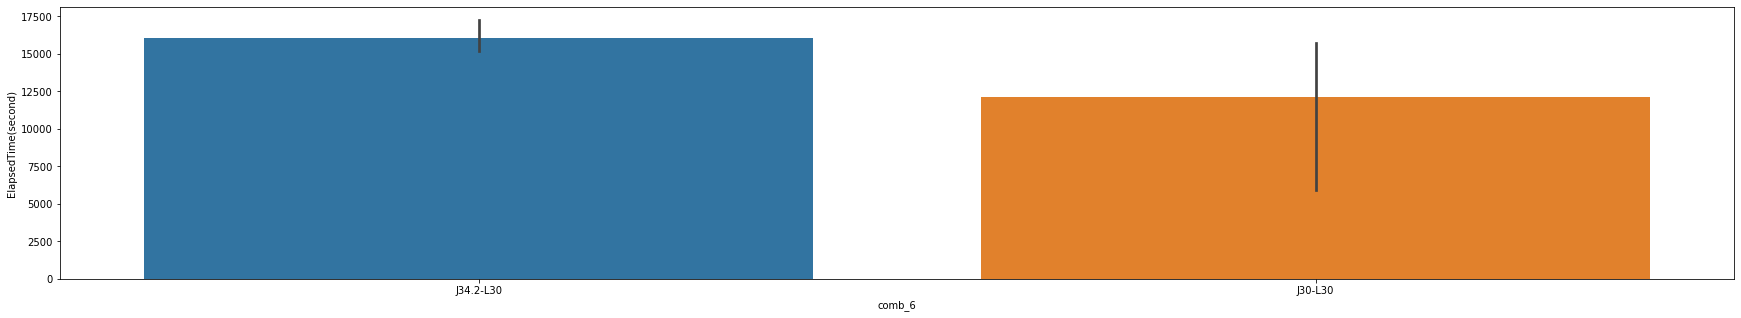

In [98]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="comb_6", y="ElapsedTime(second)", data=v)
plt.show()

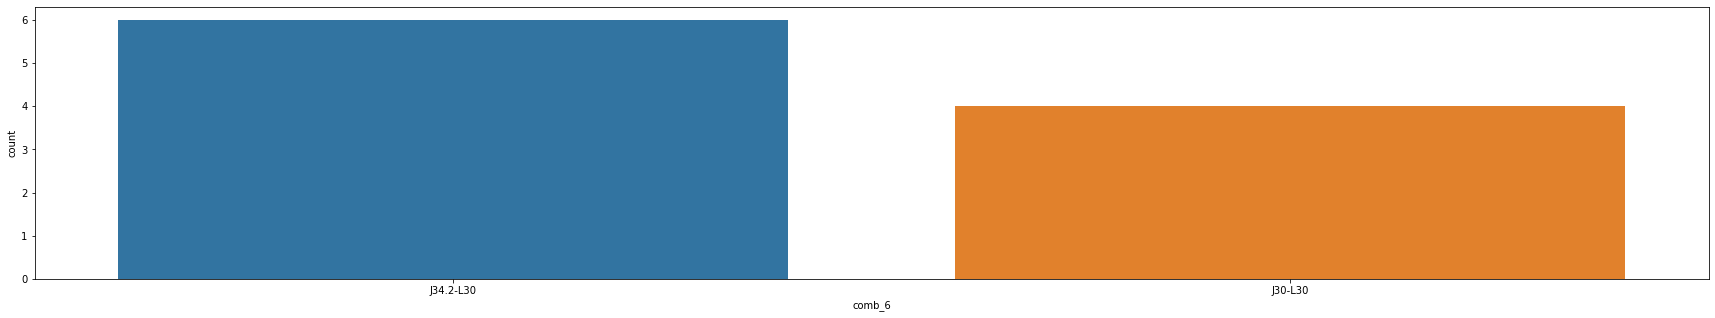

In [73]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="comb_6", data=v)
plt.show()

In [99]:
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [77]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools

# example DataFrame

# function to generate all possible combinations for a set of diagnoses
def generate_combinations(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(z.iterrows(), total=len(z)):
    combos = generate_combinations(row['Diagnosis2'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        z.at[i, col_name] = combo

# drop original 'Diagnosis' column

print(z)

  0%|          | 0/2820 [00:00<?, ?it/s]

        ID DiagnosticICD10Code     SurgeryGroup   AnesthesiaType  \
0     1829                 L05              [3]  Spinal Anestezi   
1     1104               N20.1              [3]  Spinal Anestezi   
2     1850               K80.8              [4]   Genel Anestezi   
3     1059          nan, M51.1           [1, 4]   Genel Anestezi   
4      608   M51.1, nan, M48.0  [1, 4, 3, 2, 5]   Genel Anestezi   
...    ...                 ...              ...              ...   
2817    73                 NaN           [4, 3]              NaN   
2818    12                 NaN           [1, 1]              NaN   
2819   110                 NaN              [4]              NaN   
2820  2572                 NaN              [4]              NaN   
2821  1357                 NaN              [2]              NaN   

                                            SurgeryName  Age     Sex  \
0                                        Pilonidal kist   26    MALE   
1                                      

In [80]:
z.tail()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Diagnosis2,contain_nan,sum,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
2817,73,NaN,"[4, 3]",NaN,NaN,59,FEMALE,ORTOPED? SERV?S?,32,7,8079,[],0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2818,12,NaN,"[1, 1]",NaN,"Alt ekstremitenin variköz venleri, ülserli",48,FEMALE,GENEL KARMA CERRAH? SERV?S?,8,5,2304,[],0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2819,110,NaN,[4],NaN,"Bilateral inguinal herni, obstrüksiyonsuz veya...",55,MALE,GENEL CERRAH? SERV?S?,33,11,5211,[],0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,2572,NaN,[4],NaN,"Derinin ve subkutanöz dokunun lokalize ?i?me, ...",49,FEMALE,GENEL CERRAH? SERV?S?,29,2,3308,[],0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,1357,NaN,[2],NaN,Blefarospazm,38,FEMALE,PLAST?K CERRAH?,28,14,5690,[],0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Diagnosis2,contain_nan,sum,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1829,L05,[3],Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,[L05],0,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,[3],Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,[N20.1],0,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,[4],Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,[K80.8],0,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","[1, 4]",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,[M51.1],1,5,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","[1, 4, 3, 2, 5]",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,"[M48.0, M51.1]",1,15,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
z[z["comb_7"].isna()==False][:7]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Diagnosis2,contain_nan,sum,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
13,2544,"nan, K21, M17.9, I87.2","[4, 3]",Spinal Anestezi,"Gonartroz, tan?mlanmam??",58,FEMALE,ORTOPED? SERV?S?,32,13,6567,"[I87.2, K21, M17.9]",1,7,I,K,M,I-K,I-M,K-M,I-K-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,3014,"M50.1, Z00.0, E03.9",[5],Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",44,FEMALE,NÖRO??RÜRJ? SERV?S?,42,6,9818,"[E03.9, M50.1, Z00.0]",0,5,E,M,Z,E-M,E-Z,M-Z,E-M-Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2426,"J30, L30, J34.2","[2, 4, 3]",Genel Anestezi,Nazal septum deviasyonu,19,FEMALE,KBB SERV?S?,18,14,16330,"[J30, J34.2, L30]",0,9,J,J,L,J-J,J-L,J-L,J-J-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,3623,"L30.8, M79.1, K29.1, K40",[3],Spinal Anestezi,"Bilateral inguinal herni, obstrüksiyonsuz veya...",41,MALE,GENEL CERRAH? SERV?S?,29,12,4115,"[K29.1, K40, L30.8, M79.1]",0,3,K,K,L,M,K-K,K-L,K-M,K-L,K-M,L-M,K-K-L,K-K-M,K-L-M,K-L-M,K-K-L-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,3360,"L30.8, M79.1, K40.9",[3],Spinal Anestezi,"Bilateral inguinal herni, obstrüksiyonsuz veya...",44,MALE,GENEL CERRAH? SERV?S?,29,4,4339,"[K40.9, L30.8, M79.1]",0,3,K,L,M,K-L,K-M,L-M,K-L-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,1571,"W19, Z00.8, S52.20",[4],Genel Anestezi,"Ulna ?aft? k?r???, kapal?",52,MALE,ORTOPED? SERV?S?,40,12,5410,"[S52.20, W19, Z00.8]",0,4,S,W,Z,S-W,S-Z,W-Z,S-W-Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,3103,"Z41.2, L30.3, K40.9","[2, 3]",Genel Anestezi,Rutin ve dini sünnet,7,MALE,ÜROLOJ? SERV?S?,15,11,6234,"[K40.9, L30.3, Z41.2]",0,5,K,L,Z,K-L,K-Z,L-Z,K-L-Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
z["comb_6"].value_counts()

L-M    29
K-M    27
K-L    20
M-M    11
J-L    10
J-R     9
K-N     8
K-K     7
M-R     6
I-L     5
I-M     4
K-S     4
J-M     4
M-N     4
M-Z     3
I-K     3
J-K     3
D-L     3
J-J     3
N-N     3
W-Z     2
J-Z     2
M-S     2
E-I     2
I-N     1
L-R     1
C-K     1
A-K     1
L-T     1
G-M     1
H-H     1
L-Z     1
R-R     1
Name: comb_6, dtype: int64

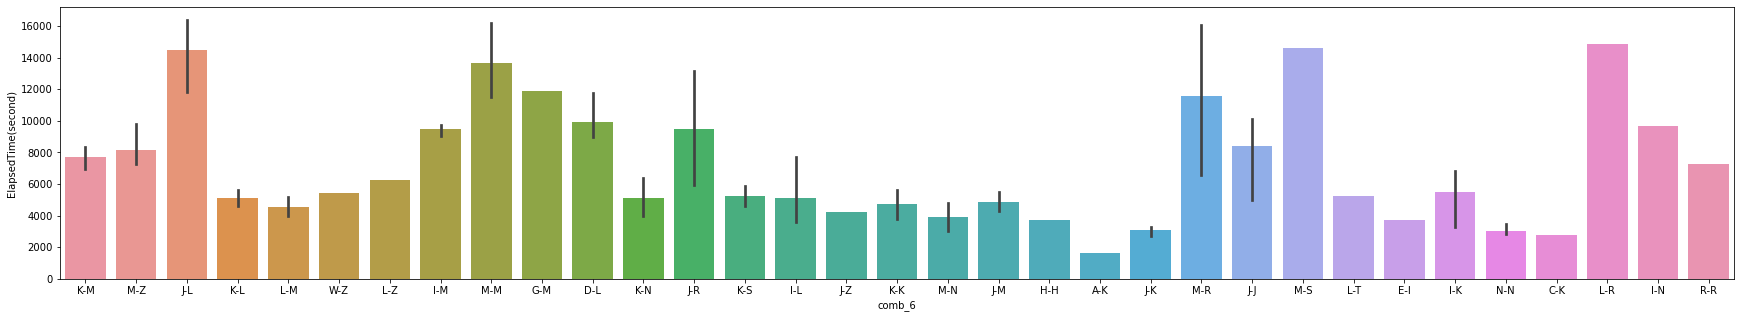

In [114]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="comb_6", y="ElapsedTime(second)", data=z)
plt.show()

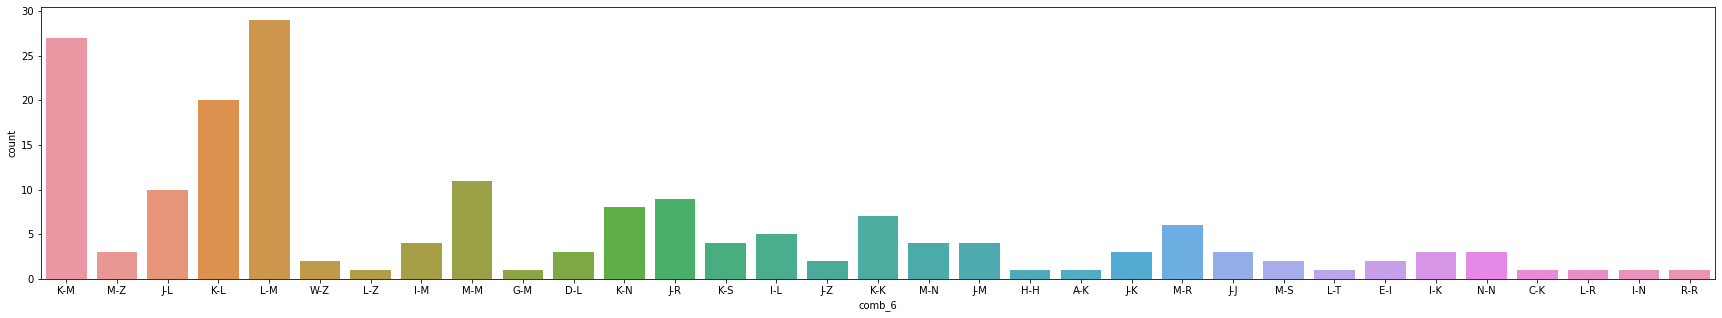

In [115]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="comb_6", data=z)
plt.show()

In [66]:
type(t.iloc[-1,1])

list

In [67]:
t['Diagnosis2'] = t['Diagnosis2'].apply(lambda x: np.nan if len(x) == 0 else x)

In [70]:
t.head()

,ID,Diagnosis2,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15
2591,3483,"[J30, J34.2, L30, R07.0]",J,J,L,R,J-J,J-L,J-R,J-L,J-R,L-R,J-J-L,J-J-R,J-L-R,J-L-R,J-J-L-R
2592,3002,[K40],K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2593,2739,[J38.1],J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2594,222,"[M25.5, S46.0]",M,S,M-S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2595,1169,[K80.8],K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
t["Diagnosis2"].replace('', np.nan, inplace=True)

In [53]:
t.head()

,ID,Diagnosis2,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15
2591,3483,"{J30, R07.0, L30, J34.2}",J,R,L,J,J-R,J-L,J-J,R-L,R-J,L-J,J-R-L,J-R-J,J-L-J,R-L-J,J-R-L-J
2592,3002,{K40},K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2593,2739,{J38.1},J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2594,222,"{S46.0, M25.5}",S,M,S-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2595,1169,{K80.8},K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
z[z["ID"]==245]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Diagnosis2
2014,245,"K21.9, J15.9, R31, N30.0, M19.9, I10",C,Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415,"{K21.9, N30.0, M19.9, I10, J15.9, R31}"


## to-do: combination of every diagnosis, first sort diagnosis codes

In [ ]:
df = train[train["DiagnosticICD10Code"].str.contains('M', na=False) & train["DiagnosticICD10Code"].str.contains('R', na=False)]
df2 = train[train["DiagnosticICD10Code"].str.contains('M5', na=False)]
train.iloc[df["ElapsedTime(second)"].sort_values().index]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
331,2624,{'M25.5'},"{'B', 'C'}",Genel Anestezi,Eklem a?r?s?,57,FEMALE,ORTOPED? SERV?S?,40,13,97
1057,2004,{'M51.8'},{0},Lokal Anestezi,NaN,53,FEMALE,ORTOPED? SERV?S?,21,12,351
2449,2006,{'M51.8'},{0},Lokal Anestezi,NaN,53,FEMALE,ORTOPED? SERV?S?,21,12,436
2239,2718,{'M51.8'},{0},Lokal Anestezi,"?ntervertebral disk bozukluklar? di?er, tan?ml...",70,FEMALE,NÖRO??RÜRJ? SERV?S?,21,2,454
2471,2000,{'M51.8'},{0},Lokal Anestezi,NaN,50,FEMALE,ORTOPED? SERV?S?,21,12,459
...,...,...,...,...,...,...,...,...,...,...,...
347,579,"{'D33.4', nan, 'M51.1', 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,50,FEMALE,ORTOPED? SERV?S?,21,6,18409
670,3656,"{nan, 'M95.0', 'J34.2'}","{0, 'B', 'C'}",Genel Anestezi,Nazal septum deviasyonu,43,FEMALE,KBB SERV?S?,2,2,18545
266,1554,"{nan, 'M51.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,56,FEMALE,ORTOPED? SERV?S?,21,13,19111
1259,2547,"{'R52.9', nan, 'I10', 'M51.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,58,FEMALE,NÖRO??RÜRJ? SERV?S?,21,2,19264


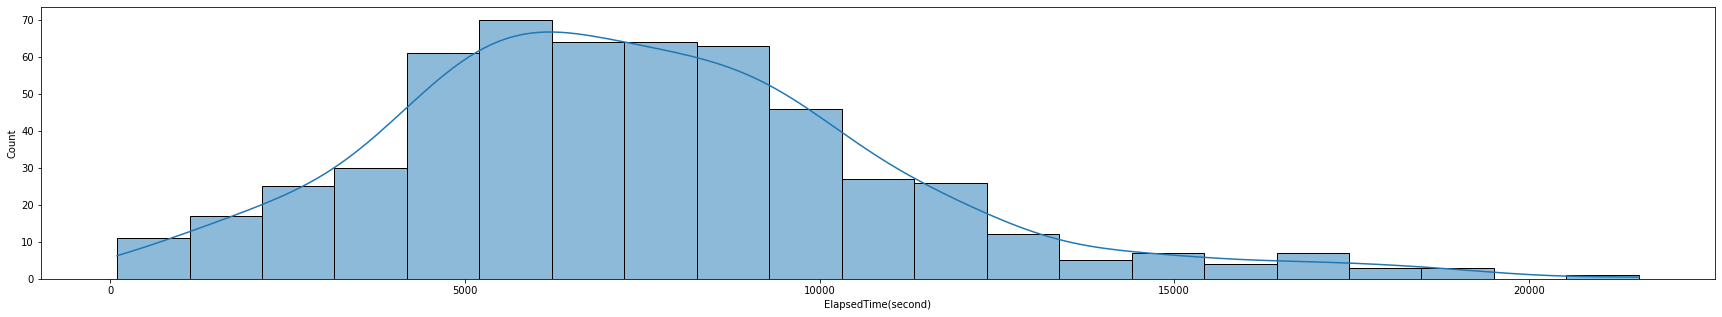

In [ ]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df, kde=True)
plt.show()


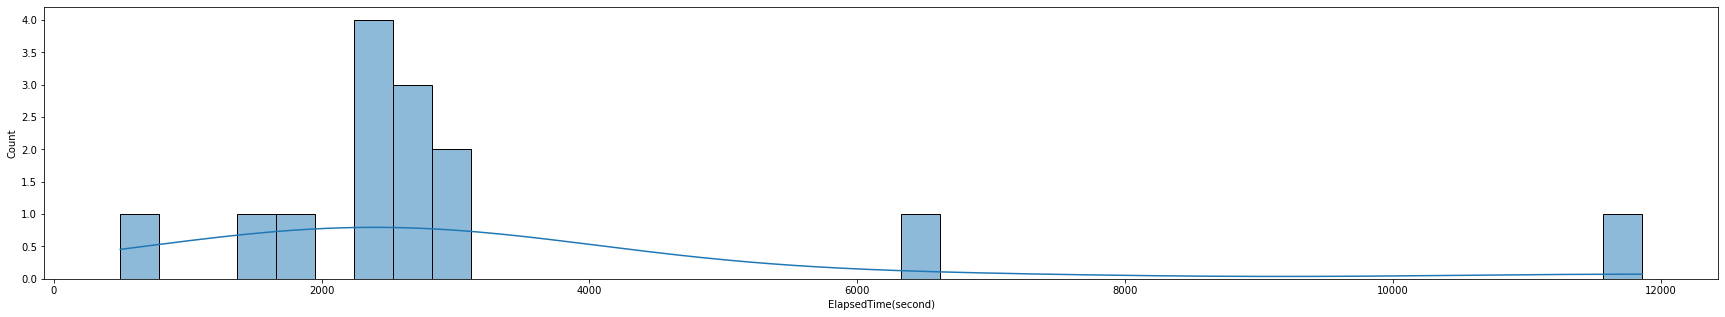

In [ ]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df2, kde=True)
plt.show()


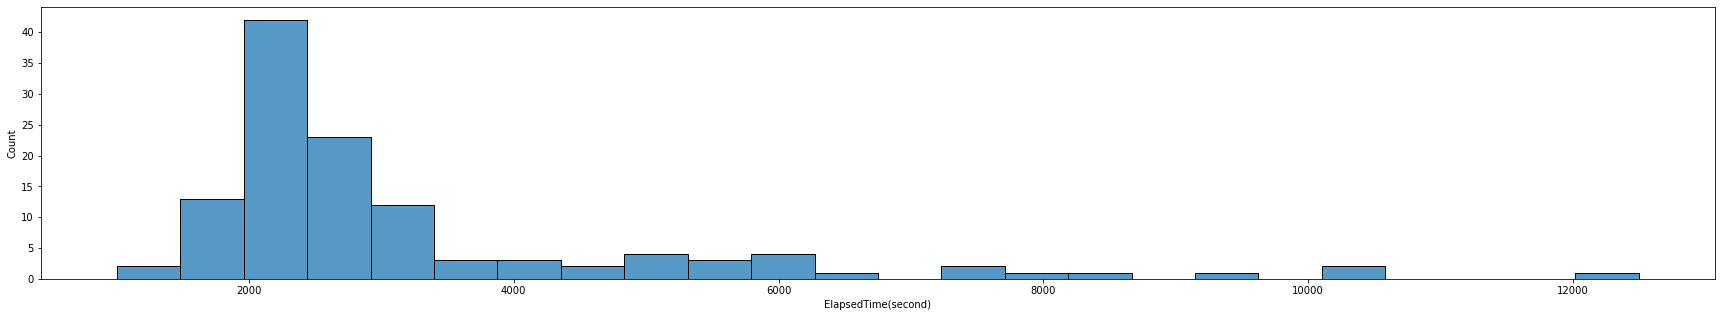

In [ ]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df)
plt.show()


## TODO:  ML